In [12]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import theano, theano.tensor as T 

import lasagne, lasagne.layers

print ("theano",theano.version.full_version)
print ("lasagne",lasagne.__version__)

theano 0.8.2.dev-RELEASE
lasagne 0.2.dev1


In [2]:
import skimage, scipy
from skimage.io import imread, imsave

In [3]:
!wget -c https://i.imgur.com/3skvA.jpg

--2016-12-08 17:08:44--  https://i.imgur.com/3skvA.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.32.193
Connecting to i.imgur.com (i.imgur.com)|151.101.32.193|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



('img_raw', (1016, 2048, 3))


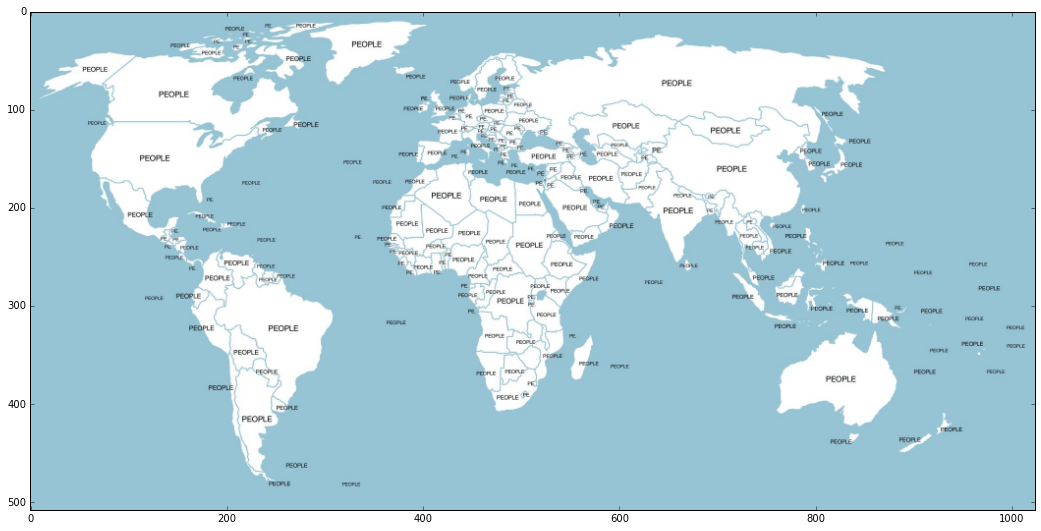

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 9)

img_raw = imread("3skvA.jpg")
print ("img_raw", img_raw.shape)
img_raw = scipy.misc.imresize(img_raw, (img_raw.shape[0]/2,img_raw.shape[1]/2,img_raw.shape[2]))

plt.imshow(img_raw);

In [5]:
input_var = T.tensor4('inputs')
input_shape = (None, 3,1016,2048)
img = lasagne.layers.InputLayer(shape=input_shape, input_var=input_var)

loc_var = T.matrix('loc')
loc_shape = (None,6)
loc = lasagne.layers.InputLayer(shape=loc_shape, input_var=loc_var)

img_trans = lasagne.layers.TransformerLayer(img, loc, downsample_factor=5.0)
print ("Transformer network output shape: ", img_trans.output_shape)

('Transformer network output shape: ', (None, 3, 203, 409))


In [6]:
output_shape = lasagne.layers.get_output_shape(img_trans)
print ("input_shape:",input_shape,"-> output_shape:",output_shape)

('input_shape:', (None, 3, 1016, 2048), '-> output_shape:', (None, 3, 203, 409))


In [7]:
img_trans_output = lasagne.layers.get_output(img_trans)
loc_output = lasagne.layers.get_output(loc)

f_transform = theano.function([input_var, loc_var], 
                              img_trans_output, 
                              allow_input_downcast=True)

print ("DONE building output functions")

DONE building output functions


In [8]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, FloatSlider
import ipywidgets as widgets

In [9]:
def explore(t11=0.5,t12=0,t13=0,t21=0,t22=1,t23=0):
    o = f_transform([np.transpose(img_raw, (2, 0, 1))], [[t11,t12,t13,t21,t22,t23]])
    oo = np.transpose(o[0],(1,2,0))
    plt.imshow(256-oo.astype(int), interpolation='none');

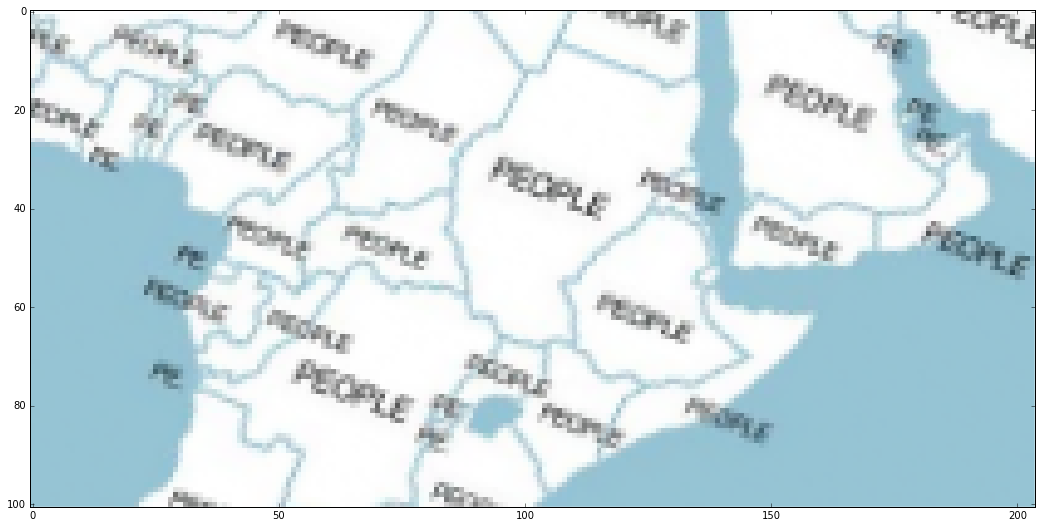

In [10]:
interact(explore, 
         t11=FloatSlider(value=1,min=0, max=2, step=0.05,continuous_update=True),
         t12=FloatSlider(value=0,min=-1, max=1, step=0.05,continuous_update=True),
         t13=FloatSlider(value=0,min=-1, max=1, step=0.05,continuous_update=True),
         t21=FloatSlider(value=0,min=-1, max=1, step=0.05,continuous_update=True),
         t22=FloatSlider(value=1,min=0, max=2, step=0.05,continuous_update=True),
         t23=FloatSlider(value=0,min=-1, max=1, step=0.05,continuous_update=True),
        );